In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits

from cycspec_simulator import (
    TemplateProfile,
    BasebandModel,
    FreqOnlyPredictor,
    ExponentialScatteringModel,
    pspec_ryan4,
    pspec_corrfirst,
    pspec_numba,
)

%matplotlib notebook

In [2]:
template_file = "B1937+21.Rcvr1_2.GUPPI.15y.x.sum.sm"
template = TemplateProfile.from_file(template_file)
template.normalize()
template.make_posdef()

Adjusting I**2 by 5.5361972783884994e-08


In [3]:
pulse_freq = 641.948222127829 # Hz
bandwidth = 1.5625e6 # Hz
model = BasebandModel(template, bandwidth=bandwidth, pulse_freq=pulse_freq)
predictor = FreqOnlyPredictor(pulse_freq)

In [4]:
scattering_model = ExponentialScatteringModel(scattering_time=40e-6, bandwidth=model.bandwidth, cutoff=20)
pattern = scattering_model.realize()

<IPython.core.display.Javascript object>


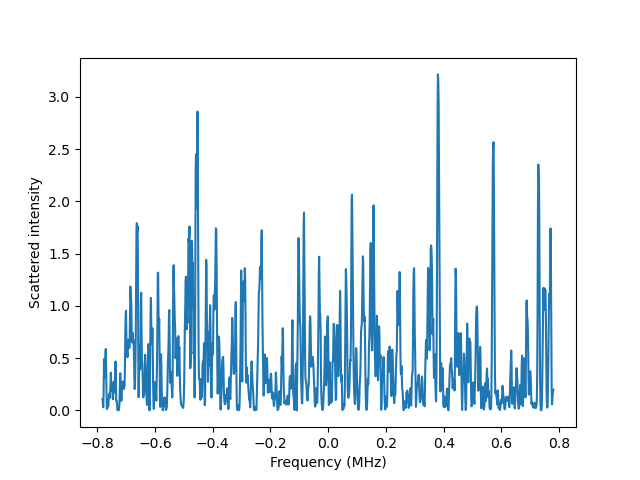

In [5]:
pattern.plot_scattered_intensity()

In [6]:
data = model.sample(2**22)
data = pattern.scatter(data)

In [7]:
pspec = pspec_numba(data, 1024, 1024, predictor)

In [8]:
2**22//(1024*1024)

4

<IPython.core.display.Javascript object>


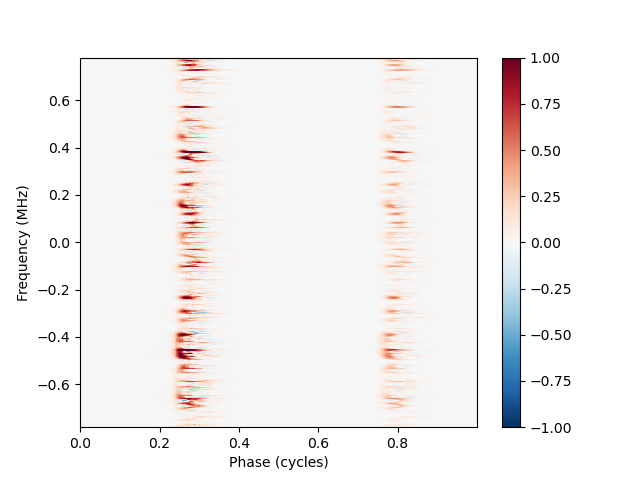

In [9]:
pc = pspec.plot(shift=0.25, cmap='RdBu_r', sym_lim=True, vmin=-1, vmax=1)
plt.colorbar(pc)
plt.show()

<IPython.core.display.Javascript object>


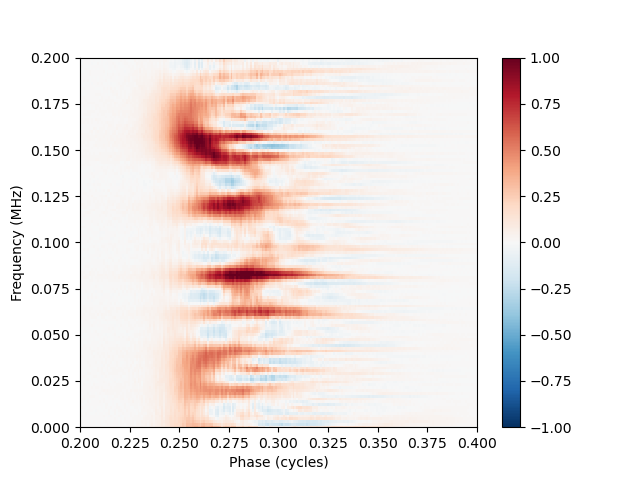

In [10]:
pc = pspec.plot(what='I', shift=0.25, cmap='RdBu_r', sym_lim=True, vmin=-1, vmax=1)
plt.colorbar(pc)
plt.xlim([0.2, 0.4])
plt.ylim([0.0, 0.2])
plt.show()

<IPython.core.display.Javascript object>


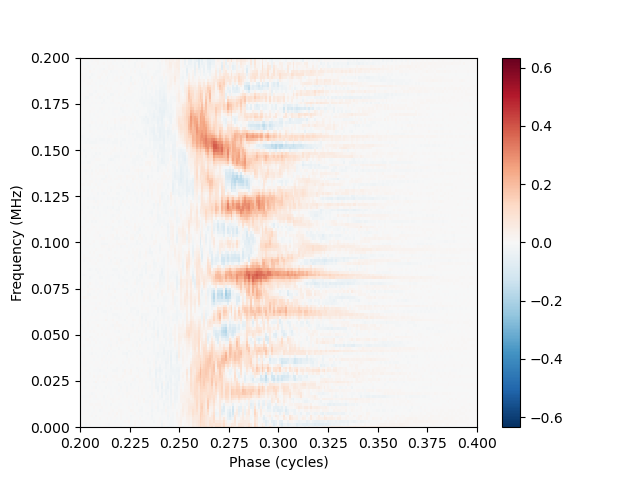

In [11]:
pc = pspec.plot(what='U', shift=0.25, cmap='RdBu_r', sym_lim=True, vmin=-1, vmax=1)
plt.colorbar(pc)
plt.xlim([0.2, 0.4])
plt.ylim([0.0, 0.2])
plt.show()

In [12]:
from cycspec_simulator import guppi_raw

In [13]:
header = guppi_raw.GuppiRawHeader({
    'SRC_NAME': 'B1937+21',
    'TELESCOP': 'GBT',
    'BACKEND': 'GUPPI',
    'OBSERVER': 'cycspec-simulator',
    'PKTIDX': 0,
    'PKTFMT': '1SFA',
})
guppi_raw.write('B1937+21-40us.raw', data, header)

In [14]:
!du -sh *

16M	B1937+21-40us.raw
68K	B1937+21.Rcvr1_2.GUPPI.15y.x.sum.sm
100K	benchmarking.ipynb
728K	simulate.ipynb
724K	symmetric-vs-asymmetric.ipynb
1.1M	template-recovery.ipynb


In [29]:
!head B1937+21-40us.raw

SRC_NAME= 'B1937+21'                                                            TELESCOP= 'GBT     '                                                            BACKEND = 'GUPPI   '                                                            OBSERVER= 'cycspec-simulator'                                                   PKTIDX  =                    0                                                  PKTFMT  = '1SFA    '                                                            NPOL    = '4       '                                                            NBITS   =                    8                                                  OBSNCHAN= '1       '                                                            BLOCSIZE=             16772220                                                  OVERLAP =                    0                                                  END                                                                             ��� 	�� ����
�
����
��

In [24]:
headers, new_data = guppi_raw.read('B1937+21-40us.raw', use_dask=False)

In [28]:
np.all(new_data == guppi_raw.quantize(data))

True